In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [2]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [11]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [15]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [16]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

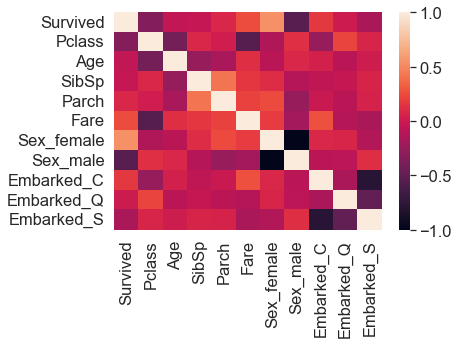

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [18]:
used_features = ["Pclass","Age","SibSp","Parch","Sex_female","Sex_male"
                ,"Embarked_C","Embarked_Q","Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [21]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

C:\Users\jemmy\anaconda3\envs\pyy\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
y_pred = LogReg.predict(X_test)

In [23]:
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [24]:
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [25]:
len(X_test)

267

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [27]:
LogReg.coef_

array([[-1.03868991, -0.03965701, -0.23989023, -0.04214884,  1.1923166 ,
        -1.1965502 ,  0.3460606 , -0.03357944, -0.31671476]])

In [28]:
LogReg.intercept_

array([3.64541822])

In [29]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
LogReg.predict_proba(X_test)

array([[0.26580964, 0.73419036],
       [0.39684199, 0.60315801],
       [0.94722269, 0.05277731],
       [0.25853948, 0.74146052],
       [0.94389889, 0.05610111],
       [0.13535189, 0.86464811],
       [0.33378304, 0.66621696],
       [0.51877501, 0.48122499],
       [0.78199823, 0.21800177],
       [0.40760668, 0.59239332],
       [0.74039356, 0.25960644],
       [0.21219404, 0.78780596],
       [0.74937464, 0.25062536],
       [0.14640465, 0.85359535],
       [0.86487336, 0.13512664],
       [0.36993489, 0.63006511],
       [0.89336038, 0.10663962],
       [0.29789123, 0.70210877],
       [0.1766608 , 0.8233392 ],
       [0.39988309, 0.60011691],
       [0.90490389, 0.09509611],
       [0.55407916, 0.44592084],
       [0.86421058, 0.13578942],
       [0.93725593, 0.06274407],
       [0.51698937, 0.48301063],
       [0.51558469, 0.48441531],
       [0.03941722, 0.96058278],
       [0.86944127, 0.13055873],
       [0.89803458, 0.10196542],
       [0.32380994, 0.67619006],
       [0.